In [1]:
# !mamba install -c conda-forge geopandas
# !mamba install -c conda-forge geopandas fiona gdal pyogrio

In [1]:
from helpers.locations import *
from helpers.drugs import *
from helpers.dates import *
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
state = "Colorado"
legalisation_date = "2014-01-01"

# df_drug = pd.read_csv("data/drugs/US_Oxycodone.csv")
DRUG_NAMES = ["US_Amphetamine", "US_Codeine", "US_Hydrocodone", "US_Morphine", "US_Oxycodone"]
df_drug = get_drugs_dfs(DRUG_NAMES)
df_drug = df_drug.generate_state_column("placeDcid")
df_drug = df_drug.generate_year()
df_drug['FIPS'] = df_drug['placeDcid'].str.split('/').str[-1]
df_drug

,placeDcid,placeName,Date,US_Amphetamine,US_Codeine,US_Hydrocodone,US_Morphine,US_Oxycodone,state,Year,FIPS
0,geoId/01001,Autauga County,2006-01,301.62,456.09,1484.79,472.42,720.13,Alabama,2006,01001
1,geoId/01001,Autauga County,2006-04,277.00,500.07,1641.61,535.16,776.14,Alabama,2006,01001
2,geoId/01001,Autauga County,2006-07,280.13,442.30,1660.31,459.76,707.36,Alabama,2006,01001
3,geoId/01001,Autauga County,2006-10,323.46,425.44,1977.05,487.07,769.49,Alabama,2006,01001
4,geoId/01001,Autauga County,2007-01,341.98,447.23,1989.93,528.35,763.86,Alabama,2007,01001
...,...,...,...,...,...,...,...,...,...,...,...
154507,geoId/72153,Yauco Municipio,2016-10,68.58,181.50,14.18,18.12,165.29,Puerto Rico,2016,72153
154508,geoId/72153,Yauco Municipio,2017-01,70.51,178.41,14.27,20.78,163.57,Puerto Rico,2017,72153
154509,geoId/72153,Yauco Municipio,2017-04,65.20,177.26,9.32,16.49,120.89,Puerto Rico,2017,72153
154510,geoId/72153,Yauco Municipio,2017-07,65.22,141.04,5.24,11.66,68.56,Puerto Rico,2017,72153


In [4]:
df_drug_state = df_drug[df_drug["state"] == state]
df_drug_state

,placeDcid,placeName,Date,US_Amphetamine,US_Codeine,US_Hydrocodone,US_Morphine,US_Oxycodone,state
11664,geoId/08001,Adams County,2006-01,1869.13,4005.69,5059.35,6168.69,11212.84,Colorado
11665,geoId/08001,Adams County,2006-04,1883.07,3971.72,5877.17,6580.74,11972.14,Colorado
11666,geoId/08001,Adams County,2006-07,1934.44,4242.22,6051.95,6625.86,12636.04,Colorado
11667,geoId/08001,Adams County,2006-10,2071.65,4190.76,6129.18,6816.41,13098.87,Colorado
11668,geoId/08001,Adams County,2007-01,2180.67,4134.84,6391.78,7197.54,13762.62,Colorado
...,...,...,...,...,...,...,...,...,...
14731,geoId/08125,Yuma County,2016-10,54.35,64.98,143.34,177.06,359.98,Colorado
14732,geoId/08125,Yuma County,2017-01,48.03,62.45,141.00,193.09,333.51,Colorado
14733,geoId/08125,Yuma County,2017-04,46.85,49.90,133.03,172.37,328.22,Colorado
14734,geoId/08125,Yuma County,2017-07,53.70,58.16,133.53,160.10,308.47,Colorado


In [5]:
# Example legalisation_date
# legalisation_date_ts = pd.Timestamp("2014-01-01")  # Replace with actual date

DATE_COLUMN = "Date"

# Split into two data frames
df_before_legalisation = df_drug_state[df_drug_state[DATE_COLUMN] < legalisation_date]
df_after_legalisation = df_drug_state[df_drug_state[DATE_COLUMN] >= legalisation_date]
df_before_legalisation

,placeDcid,placeName,Date,US_Amphetamine,US_Codeine,US_Hydrocodone,US_Morphine,US_Oxycodone,state
11664,geoId/08001,Adams County,2006-01,1869.13,4005.69,5059.35,6168.69,11212.84,Colorado
11665,geoId/08001,Adams County,2006-04,1883.07,3971.72,5877.17,6580.74,11972.14,Colorado
11666,geoId/08001,Adams County,2006-07,1934.44,4242.22,6051.95,6625.86,12636.04,Colorado
11667,geoId/08001,Adams County,2006-10,2071.65,4190.76,6129.18,6816.41,13098.87,Colorado
11668,geoId/08001,Adams County,2007-01,2180.67,4134.84,6391.78,7197.54,13762.62,Colorado
...,...,...,...,...,...,...,...,...,...
14716,geoId/08125,Yuma County,2013-01,33.62,94.09,196.66,236.77,339.05,Colorado
14717,geoId/08125,Yuma County,2013-04,27.54,88.28,199.53,225.94,340.44,Colorado
14718,geoId/08125,Yuma County,2013-07,29.94,104.14,221.16,237.71,360.21,Colorado
14719,geoId/08125,Yuma County,2013-10,35.99,82.38,210.02,242.71,387.49,Colorado


In [6]:
df_after_legalisation

,placeDcid,placeName,Date,US_Amphetamine,US_Codeine,US_Hydrocodone,US_Morphine,US_Oxycodone,state
11697,geoId/08001,Adams County,2014-04,5326.10,2525.79,7086.91,9861.08,23884.75,Colorado
11698,geoId/08001,Adams County,2014-07,5647.12,2461.58,7383.97,9501.01,24141.40,Colorado
11699,geoId/08001,Adams County,2014-10,5853.90,2836.91,6578.07,9582.99,24639.61,Colorado
11700,geoId/08001,Adams County,2015-01,5915.33,2558.08,6355.34,9058.61,23757.94,Colorado
11701,geoId/08001,Adams County,2015-04,6200.28,2738.48,6307.07,9006.02,23787.81,Colorado
...,...,...,...,...,...,...,...,...,...
14731,geoId/08125,Yuma County,2016-10,54.35,64.98,143.34,177.06,359.98,Colorado
14732,geoId/08125,Yuma County,2017-01,48.03,62.45,141.00,193.09,333.51,Colorado
14733,geoId/08125,Yuma County,2017-04,46.85,49.90,133.03,172.37,328.22,Colorado
14734,geoId/08125,Yuma County,2017-07,53.70,58.16,133.53,160.10,308.47,Colorado


# Visualisations

/var/folders/h6/sy6yc4qn7vg_qrvftw3gqnl00000gn/T/ipykernel_91351/3292159688.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cropped_df['FIPS'] = cropped_df['placeDcid'].str.split('/').str[-1]


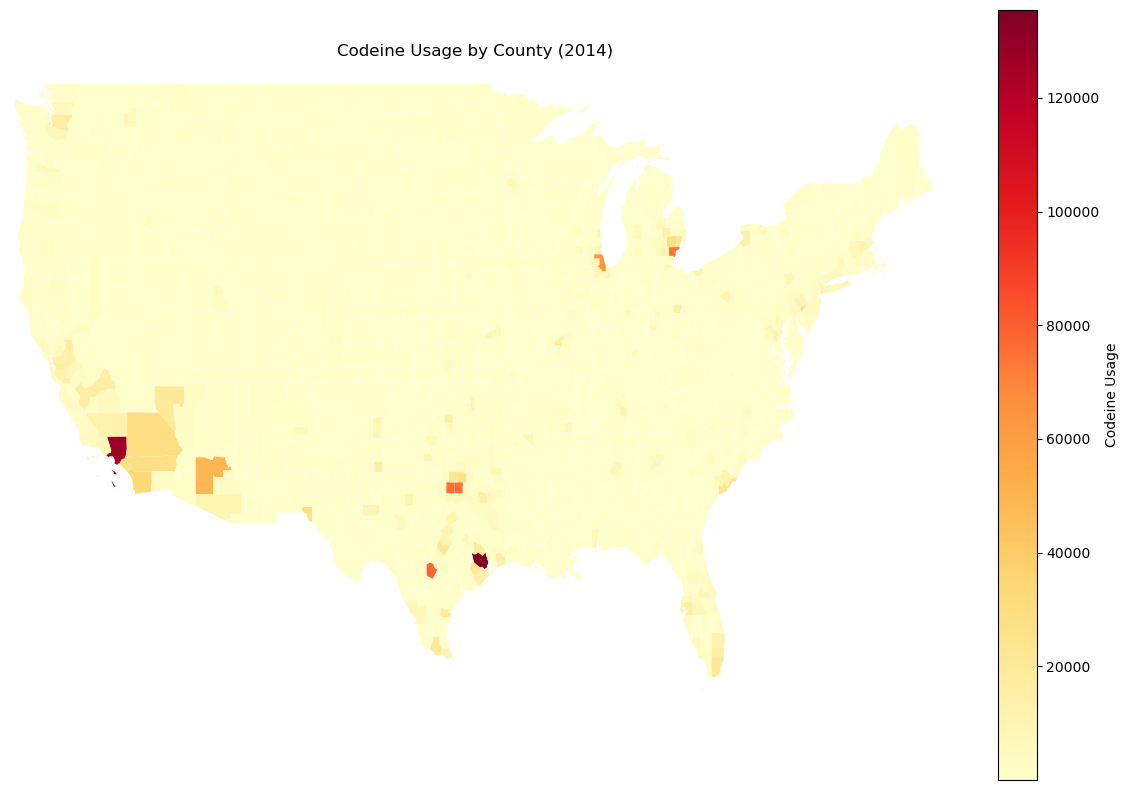

In [24]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Create dataframe and process FIPS codes
cropped_df = df_drug[df_drug["Date"] == "2017-10"]

# Load US counties shapefile
counties = gpd.read_file('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json')
merged = counties.merge(cropped_df, how='left', left_on='id', right_on='FIPS')

# Create the plot
fig, ax = plt.subplots(1, figsize=(15, 10))

# Create choropleth map
merged.plot(
    column='US_Codeine',
    ax=ax,
    legend=True,
    legend_kwds={'label': 'Codeine Usage'},
    missing_kwds={'color': 'lightgrey'},
    cmap='YlOrRd'
)

# Set the map boundaries to focus on continental US
ax.set_xlim([-125, -66.5])  # Longitude limits for continental US
ax.set_ylim([24, 49])      # Latitude limits for continental US

# Customize the map
plt.title('Codeine Usage by County (2014)', pad=20)
plt.axis('off')

# Show the plot
plt.show()

In [25]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from pathlib import Path

# Create output directory for maps if it doesn't exist
output_dir = Path('drug_maps')
output_dir.mkdir(exist_ok=True)

# Get sorted list of unique dates
dates = sorted(df_drug['Date'].unique())

# Find the global min and max for consistent color scale
global_min = df_drug['US_Codeine'].min()
global_max = df_drug['US_Codeine'].max()

# Load US counties shapefile (load once outside the loop for efficiency)
counties = gpd.read_file('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json')

# Create a map for each date
for date in dates:
    # Create dataframe and process FIPS codes for this date
    cropped_df = df_drug[df_drug["Date"] == date]
    cropped_df['FIPS'] = cropped_df['placeDcid'].str.split('/').str[-1]
    
    # Merge with geographic data
    merged = counties.merge(cropped_df, how='left', left_on='id', right_on='FIPS')
    
    # Create the plot
    fig, ax = plt.subplots(1, figsize=(15, 10))
    
    # Create choropleth map
    merged.plot(
        column='US_Codeine',
        ax=ax,
        legend=True,
        legend_kwds={'label': 'Codeine Usage'},
        missing_kwds={'color': 'lightgrey'},
        cmap='YlOrRd',
        vmin=global_min,  # Set consistent color scale
        vmax=global_max
    )
    
    # Set the map boundaries to focus on continental US
    ax.set_xlim([-125, -66.5])
    ax.set_ylim([24, 49])
    
    # Customize the map
    plt.title(f'Codeine Usage by County ({date})', pad=20)
    plt.axis('off')
    
    # Save the plot
    filename = f'drug_maps/codeine_map_{date.replace("-", "_")}.png'
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.close()  # Close the figure to free memory

print(f"Created maps for {len(dates)} dates in the 'drug_maps' directory")


/var/folders/h6/sy6yc4qn7vg_qrvftw3gqnl00000gn/T/ipykernel_91351/1783814501.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cropped_df['FIPS'] = cropped_df['placeDcid'].str.split('/').str[-1]
/var/folders/h6/sy6yc4qn7vg_qrvftw3gqnl00000gn/T/ipykernel_91351/1783814501.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cropped_df['FIPS'] = cropped_df['placeDcid'].str.split('/').str[-1]
/var/folders/h6/sy6yc4qn7vg_qrvftw3gqnl00000gn/T/ipykernel_91351/1783814501.py:25: SettingWithCopyWarning: 
A value is

Created maps for 48 dates in the 'drug_maps' directory
Created animation: drug_maps/codeine_usage_animation.gif
